In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm


auctions = pd.read_csv('C:/roberto/auctions.csv.gzip', compression = 'gzip', low_memory=False, dtype= {'auctions_type_id' : 'object','country' : 'category','date' : 'object','decide_id' : 'category','platform' : 'category', 'ref_type_id': 'category','source_id': 'category'})
#auctions = pd.read_csv('data\auctions.csv.gzip', compression = 'gzip', low_memory=False) 
#, dtype= {'country' : 'category' ,'device_id' : 'category', 'platform':'category', 'ref_type_id':'category','source_id':'category'})
#clicks = pd.read_csv('data\clicks.csv.gzip',compression = 'gzip')
#events = pd.read_csv('data\events.csv.gzip',compression = 'gzip',low_memory=False, dtype = 'object')
#installs = pd.read_csv('data\installs_train.csv', dtype= {'device_countrycode' : 'category','device_brand' : 'category','device_model' : 'category','session_user_agent' : 'category','user_agent' : 'category', 'device_language': 'category','kind': 'category','wifi': 'category','trans_id': 'category', 'ref_type': 'category'})
#target = pd.read_csv("C:/roberto/target_competencia.csv", dtype= {'index' : 'int16' ,'ref_hash' : 'int64','obj_Sc' : 'int16','obj_St' : 'int16'  })




In [39]:
auctions.count()

auction_type_id           0
country            19571319
date               19571319
device_id          19571319
platform           19571319
ref_type_id        19571319
source_id          19571319
date2              19571319
dtype: int64

Se puede observa que no encontramos nulos en el dataset

In [38]:
auctions['country'].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

Por lo que se puede observar sólo hay un sólo pais

In [2]:
#conviertiendo la fecha de object a datatime
auctions['date'] = pd.to_datetime(auctions['date'], format='%Y-%m-%d %H:%M:%S.%f')

auctions['date2'] = auctions['date'].dt.date

In [3]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id,date2
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,2019-03-11
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,2019-03-11
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,2019-03-11
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,2019-03-11
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,2019-03-11


In [47]:
auctions.dtypes

auction_type_id           float64
country                  category
date               datetime64[ns]
device_id                   int64
platform                 category
ref_type_id              category
source_id                category
date2                      object
dtype: object

In [32]:
#Se modela el dataframe para explorar por plarform por día
auctions2 = auctions[['date2','platform','date']]
auctions22 = auctions2.groupby(['date2','platform']).size().reset_index(name='cuenta')

aux1 = auctions22.loc[auctions22['platform'] == '1']
aux2 = auctions22.loc[auctions22['platform'] == '2']
aux3 = pd.merge(aux1, aux2, left_on='date2', right_on='date2', how='left')
aux3 = aux3[['date2','cuenta_x','cuenta_y']].rename(columns={'cuenta_x':'platform 1','cuenta_y':'platform 2'})
aux3

,date2,platform 1,platform 2
0,2019-03-05,719286,463115
1,2019-03-06,579624,453346
2,2019-03-07,1617609,430052
3,2019-03-08,1898054,404948
4,2019-03-09,1618742,455810
5,2019-03-10,2149876,487658
6,2019-03-11,2165005,409911
7,2019-03-12,2337162,442748
8,2019-03-13,2456467,481906


Text(0, 0.5, 'Cantidad de Auctions')

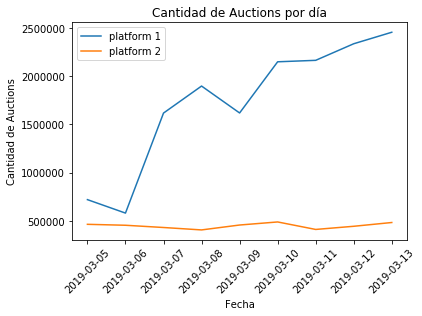

In [33]:
aux3.plot(x = 'date2', rot = 45)
plt.title('Cantidad de Auctions por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Auctions')

Se observa una tendencia al alza, pero de forma más acentuada para el platform 1.

In [56]:
auctions3 = auctions[['device_id','date']]
auctions33 = auctions3.groupby(['device_id']).size().reset_index(name='cuenta')
auctions33.sort_values(['cuenta'],ascending=False).head()

,device_id,cuenta
14311,633139769114048761,27762
161415,7202276635029175071,23055
163584,7298861376107043945,18188
141455,6302840482782120473,16400
120904,5376802567578262905,16367


Top de subastas por device